In [1]:
!git clone https://github.com/phuockhanhle/SY09_pokemon.git

Cloning into 'SY09_pokemon'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 59 (delta 13), reused 45 (delta 6), pack-reused 0
Unpacking objects: 100% (59/59), done.


In [2]:
%cd SY09_pokemon

/content/SY09_pokemon


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv("presenation/traiteQuali_diff.csv")
df = df.drop(columns='Unnamed: 0')
X = df.drop(columns = 'winner')
df.loc[df['winner']=='t','winner']=1
df.loc[df['winner']=='f','winner']=0
y = df['winner']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


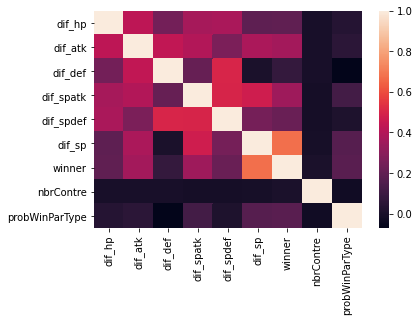

In [5]:
corr = df.corr()
sns.heatmap(corr)

In [6]:
corr

,dif_hp,dif_atk,dif_def,dif_spatk,dif_spdef,dif_sp,winner,nbrContre,probWinParType
dif_hp,1.000000,0.428312,0.244575,0.369902,0.377136,0.188492,0.194240,-0.003027,0.035259
dif_atk,0.428312,1.000000,0.439376,0.401250,0.267576,0.383405,0.361873,-0.001853,0.052006
dif_def,0.244575,0.439376,1.000000,0.210207,0.505356,0.005151,0.079377,-0.002090,-0.070978
dif_spatk,0.369902,0.401250,0.210207,1.000000,0.499986,0.475017,0.348891,-0.009020,0.118556
dif_spdef,0.377136,0.267576,0.505356,0.499986,1.000000,0.251027,0.218823,-0.009815,0.016364
dif_sp,0.188492,0.383405,0.005151,0.475017,0.251027,1.000000,0.677719,-0.004749,0.168766
winner,0.194240,0.361873,0.079377,0.348891,0.218823,0.677719,1.000000,0.004338,0.177434
nbrContre,-0.003027,-0.001853,-0.002090,-0.009020,-0.009815,-0.004749,0.004338,1.000000,-0.021343
probWinParType,0.035259,0.052006,-0.070978,0.118556,0.016364,0.168766,0.177434,-0.021343,1.000000


la correlation entre (dif_sp,winner) (dif_def,dif_spdef)

In [10]:
df

,dif_hp,dif_atk,dif_def,dif_spatk,dif_spdef,dif_sp,winner,nbrContre,probWinParType
0,-20,-6,10,-15,10,-19,0,482.0,0.431535
1,0,-39,-18,18,39,0,0,482.0,0.568465
2,-20,-35,10,-45,10,0,0,138.0,0.268116
3,-37,-80,-50,10,-50,-28,0,252.0,0.432540
4,50,50,-105,105,-160,50,1,487.0,0.542094
...,...,...,...,...,...,...,...,...,...
49995,70,80,30,80,95,30,1,584.0,0.715753
49996,25,30,0,-15,5,8,1,218.0,0.903670
49997,-13,-65,40,25,10,-25,0,1702.0,0.394242
49998,15,-5,-20,-40,0,55,1,134.0,1.000000


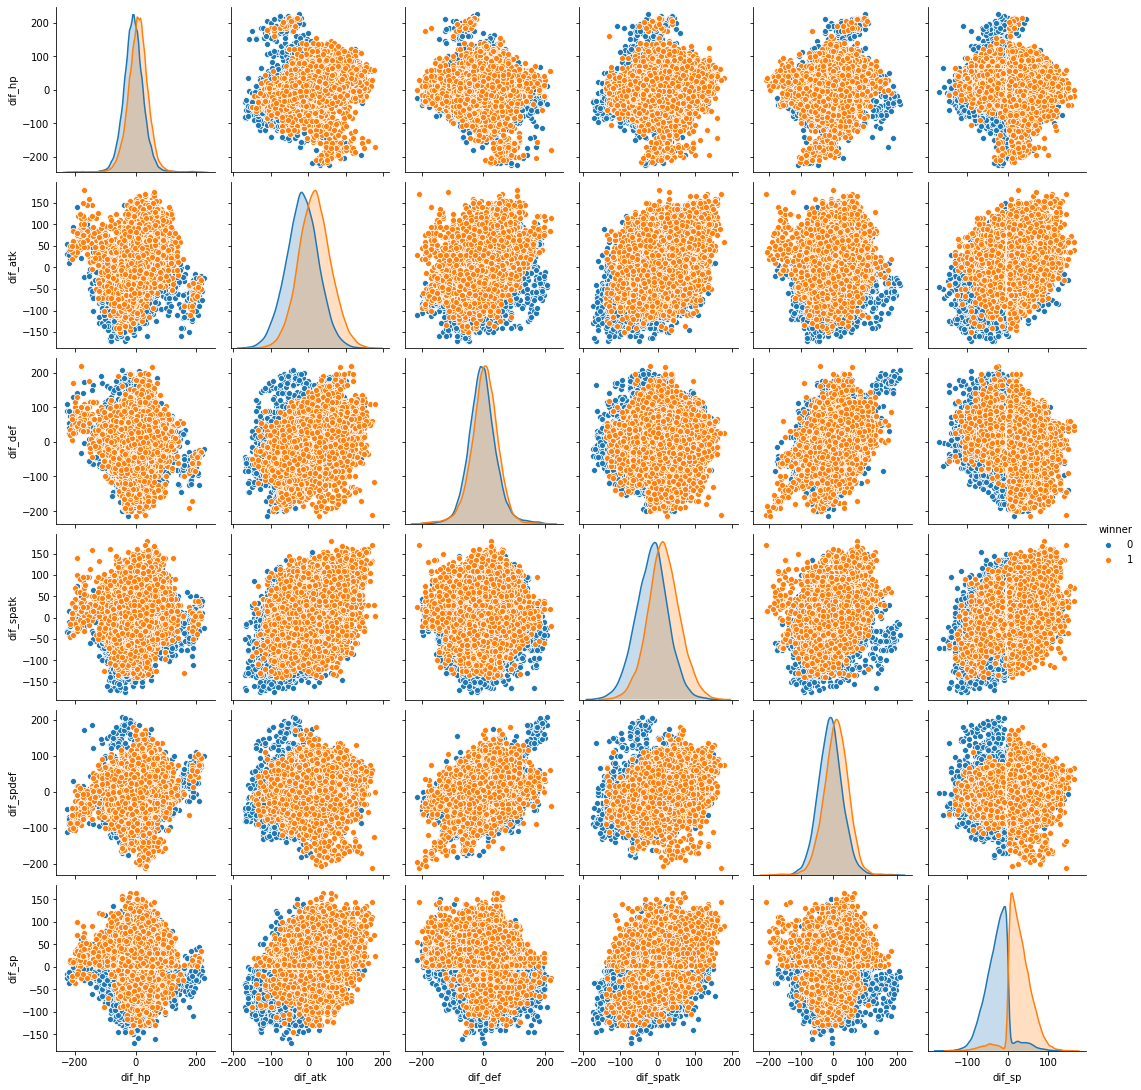

In [19]:
sns.pairplot(df,vars=["dif_hp","dif_atk","dif_def","dif_spatk","dif_spdef","dif_sp"],hue="winner")

par le graph, on peut voir que :
il y a un peu correlation lineaire entre des differences de stats
des couples ont correlation lineair (dif_spatk,def_spdef),(def_spdef,dif_def),(dif_spatk,dif_atk) (dif_spatk,dif_sp)


stats de dif_atk et dif_spatk influnce un peu sur resultat

stats de dif_sp motre parfaire le resultat

In [0]:
from sklearn.decomposition import PCA
from statistics import mean
from statistics import stdev

In [0]:
X['nbrContre'] = X['nbrContre']-mean(X['nbrContre'])/stdev(X['nbrContre'])

In [0]:
pca = PCA(n_components=X.shape[1])
pcs = pca.fit_transform(X)

In [0]:
pca.explained_variance_ratio_

array([9.29762975e-01, 3.23417006e-02, 1.35341116e-02, 9.46603921e-03,
       6.62690881e-03, 5.12104307e-03, 3.14700920e-03, 2.12793104e-07])

<BarContainer object of 8 artists>

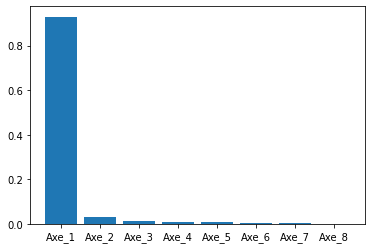

In [0]:
plt.bar(["Axe_"+str(i+1) for i in range(len(pca.explained_variance_ratio_))],pca.explained_variance_ratio_)

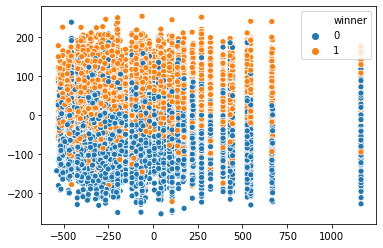

In [0]:
sns.scatterplot(x=pcs[:,0],y=pcs[:,1],hue=y)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
cls =LogisticRegression()
cls.fit(pcs[:,0:2],y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from src.utils import add_decision_boundary

In [0]:
cls.coef_

array([[3.01051525e-05, 1.64932810e-02]])

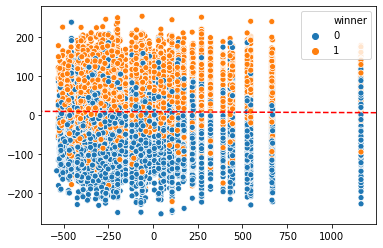

In [0]:
sns.scatterplot(x=pcs[:,0],y=pcs[:,1],hue=y)
add_decision_boundary(cls)

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly = PolynomialFeatures(degree=2)
cls2 = LogisticRegression()
pipe = make_pipeline(poly,cls2)
pipe.fit(pcs[:,0:2],y) 

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

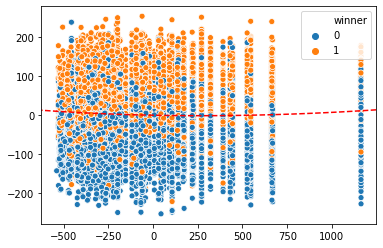

In [0]:
sns.scatterplot(x=pcs[:,0],y=pcs[:,1],hue=y)
add_decision_boundary(pipe)

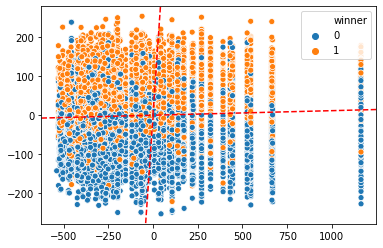

In [0]:
poly = PolynomialFeatures(degree=10)
cls2 = LogisticRegression()
pipe = make_pipeline(poly,cls2)
pipe.fit(pcs[:,0:2],y) 
sns.scatterplot(x=pcs[:,0],y=pcs[:,1],hue=y)
add_decision_boundary(pipe)

In [0]:
pca.explained_variance_

array([1.42873283e+05, 4.96983108e+03, 2.07973753e+03, 1.45461169e+03,
       1.01833289e+03, 7.86931995e+02, 4.83589416e+02, 3.26991396e-02])

In [0]:
pca.components_

array([[-2.99083896e-04, -2.46224224e-04, -2.63360943e-04,
        -1.13256010e-03, -1.04809746e-03, -5.37930871e-04,
         9.99998555e-01, -1.04255220e-05],
       [ 2.98080147e-01,  4.99707439e-01,  3.83796386e-01,
         5.03557293e-01,  3.91361524e-01,  3.27727082e-01,
         1.47006076e-03,  2.09231337e-04],
       [-2.74223314e-02, -6.71712256e-02, -7.01847024e-01,
         3.82030009e-01, -1.74548929e-01,  5.70729286e-01,
         3.47168592e-04,  7.08430173e-04],
       [ 4.77656085e-02,  7.22498098e-01, -2.90325049e-02,
        -3.89281921e-01, -5.50096323e-01,  1.43962171e-01,
        -7.55462155e-04,  5.20261195e-05],
       [-7.74795082e-01, -5.69561138e-02,  3.56502395e-01,
        -1.28599533e-01,  6.07304157e-02,  4.99127828e-01,
         3.46382016e-05,  1.04528774e-04],
       [-4.37846198e-01,  1.89703033e-01,  4.45832641e-02,
         6.35490153e-01, -3.66933461e-01, -4.81485090e-01,
         3.64044101e-06, -8.24650192e-05],
       [-3.40731398e-01,  4.295878

In [0]:
pca.